In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/New_York_City"
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   New York City - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrQ-uApAICoAABKVeuIAAAAA","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"New_York_City","wgTitle":"New York City","wgCurRevisionId":955322076,"wgRevisionId":955322076,"wgArticleId":645042,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles incorporating a citation from the 1911 Encyclopaedia Britannica with Wikisource reference","Webarchive template wayback links","CS1 maint: ref=ha

In [3]:
Primary_table = soup.find('table',{'class':'wikitable sortable'})
Primary_table

<table border="1" class="wikitable sortable" style="float:center; text-align:right; font-size:85%; margin:1em;">
<tbody><tr>
<th colspan="9" style="background-color:tan;"><div style="text-align:center; position:relative; white-space:nowrap;">New York City's <a href="/wiki/Boroughs_of_New_York_City" title="Boroughs of New York City">five boroughs</a><div class="plainlinks hlist navbar mini" style="position:absolute; right:0; top:0; margin:0 5px;"><ul><li class="nv-view"><a href="/wiki/Template:NYC_boroughs" title="Template:NYC boroughs"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:NYC_boroughs" title="Template talk:NYC boroughs"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:NYC_boroughs&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div></div>
</th></tr>
<tr style="background:#dedebb;">
<th colspan=

In [4]:
tabletext=""
for tr in Primary_table.find_all('tr'):
    row1=""
    for tds in tr.find_all('td'):
        row1=row1+","+tds.text
    tabletext=tabletext+row1[1:]
tabletext = tabletext.replace('\n,' , ',') 
print(tabletext)

The Bronx,
  Bronx,1,432,132,42.695,29,200,42.10,109.04,34,653,13,231
Brooklyn,
  Kings,2,582,830,91.559,34,600,70.82,183.42,37,137,14,649
Manhattan,
  New York,1,628,701,600.244,360,900,22.83,59.13,72,033,27,826
Queens,
   Queens,2,278,906,93.310,39,600,108.53,281.09,21,460,8,354
Staten Island,
   Richmond,476,179,14.514,30,300,58.37,151.18,8,112,3,132
City of New York,8,398,748,842.343,97,700,302.64,783.83,28,188,10,947
State of New York,19,745,289,1,701.399,85,700,47,214,122,284,416.4,159
Sources:[153] and see individual borough articles



In [5]:
#data = input_string
df = pd.DataFrame([x.split(',') for x in tabletext.split('\n')])
#df.columns = ["PostalCode","Borough","Neighborhood"]
df = df.iloc[0:10,0:13]
indexfind = df[ df[1] ==''].index
df.drop(indexfind , inplace=True)
df = df.reset_index(drop = True)
df.rename(columns={0: 'Borough', 1: 'A',2: 'B',3: 'C',4: 'D',5: 'E',6: 'F',7: 'G',8: 'H',9: 'I',10: 'J',11: 'K',12: 'L'}, inplace=True)
df.iloc[1,0] = 'Brooklyn' 
df.iloc[2,0] = 'Manhattan' 
df.iloc[4,0] = 'Staten Island' 
df.iloc[0,0] = 'Bronx' 
df.iloc[3,0] = 'Queens' 
df_fin_density = df[["Borough","J","K","L"]]
df_fin_density.iloc[4,3] = df_fin_density.iloc[4,2]
df_fin_density.iloc[4,2] = df_fin_density.iloc[4,1]
df_fin_density = df_fin_density[["Borough","K","L"]]
df_fin_density["L"] = df_fin_density["L"].astype(str).astype(int)
df_fin_density["K"] = df_fin_density["K"].astype(str).astype(int)
df_fin_density["K"] = df_fin_density["K"] * 1000
df_fin_density["Density"] = df_fin_density["K"] + df_fin_density["L"]
df_fin_densityy = df_fin_density[["Borough","Density"]]
df_fin_densityy
#dffin
#dffin.rename(columns={0: 'Borough', 1: 'Country',2: 'Neighborhood'}, inplace=True)

C:\Users\Jane\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Borough  Density
0          Bronx    13231
1       Brooklyn    14649
2      Manhattan    27826
3         Queens     8354
4  Staten Island     3132

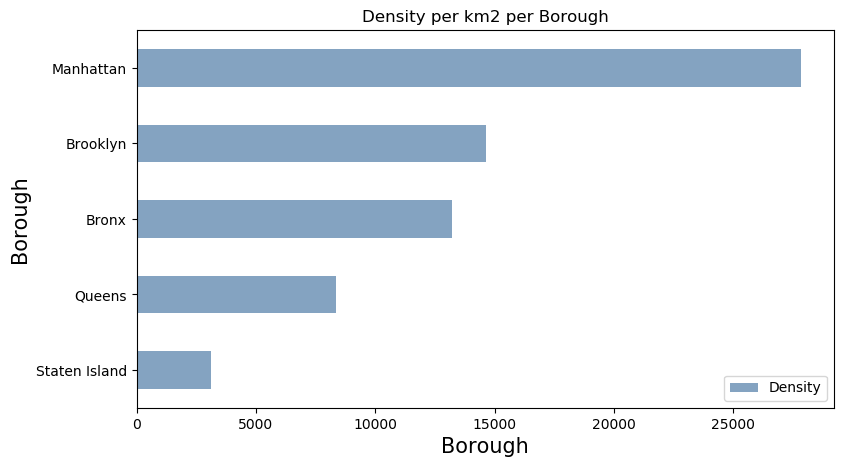

In [6]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Density per km2 per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Density', fontsize=15)
#giving a bar plot
df_fin_density.groupby('Borough')['Density'].sum().nsmallest().plot(kind='barh',color=(0.2, 0.4, 0.6, 0.6))
#legend
plt.legend()
#displays the plot
plt.show()

In [7]:
CLIENT_ID = 'RY4RFPZBBGUOMVGO2LVMTBIUTVREKDLMCKT3LEEYHHGCREYC' # your Foursquare ID
CLIENT_SECRET = 'JV3EWXSHZE4FQHO3FEZTEPA3WFLOUFAXD0YZEB0MFSDVFVSW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Your credentails:
CLIENT_ID: RY4RFPZBBGUOMVGO2LVMTBIUTVREKDLMCKT3LEEYHHGCREYC
CLIENT_SECRET:JV3EWXSHZE4FQHO3FEZTEPA3WFLOUFAXD0YZEB0MFSDVFVSW


In [8]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100

    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [9]:
def get_venue_details(venue_id):
        
   
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [10]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [12]:
new_york_df = get_new_york_data()

In [13]:
print(new_york_df.head())
print("the shape is",new_york_df.shape)


  Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585
the shape is (306, 4)


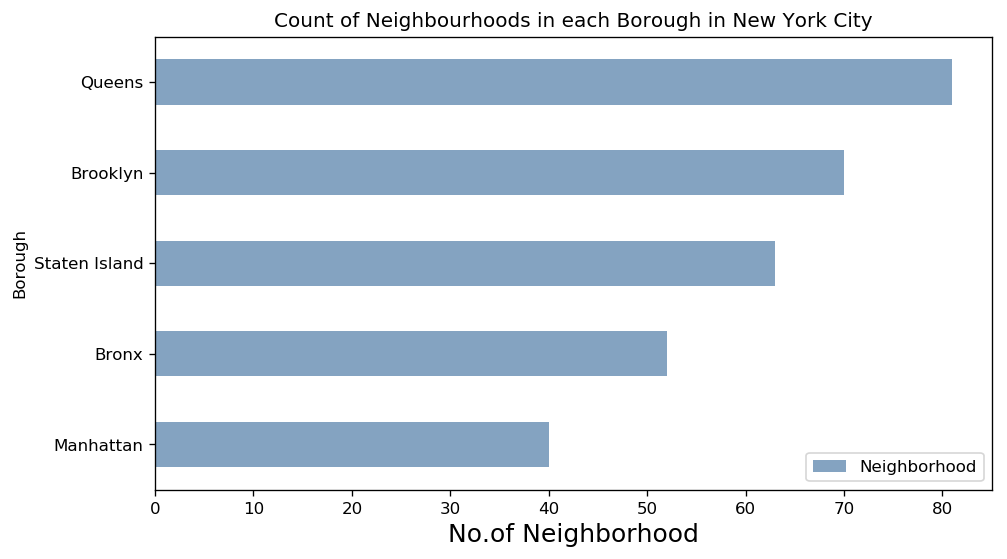

In [14]:

plt.figure(figsize=(9,5), dpi = 120)
# title
plt.title('Count of Neighbourhoods in each Borough in New York City')
#On x-axis
plt.xlabel('No.of Neighborhood', fontsize = 15)
#giving a bar plot
new_york_df.groupby('Borough')['Neighborhood'].count().nsmallest().plot(kind='barh',color=(0.2, 0.4, 0.6, 0.6))
#legend
plt.legend()
#displays the plot
plt.show()

In [19]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    RTT=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(new_york_df),')','Chinese Restaurant in '+Neighborhood+', '+Borough+':'+str(len(RTT)))
    for RTT_detail in RTT.values.tolist():
        id, name , category=RTT_detail
        rest_ny = rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                    }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Restaurant in Wakefield, Bronx:1
( 2 / 306 ) Chinese Restaurant in Co-op City, Bronx:2
( 3 / 306 ) Chinese Restaurant in Eastchester, Bronx:1
( 4 / 306 ) Chinese Restaurant in Fieldston, Bronx:1
( 5 / 306 ) Chinese Restaurant in Riverdale, Bronx:0
( 6 / 306 ) Chinese Restaurant in Kingsbridge, Bronx:0
( 7 / 306 ) Chinese Restaurant in Marble Hill, Manhattan:1
( 8 / 306 ) Chinese Restaurant in Woodlawn, Bronx:0
( 9 / 306 ) Chinese Restaurant in Norwood, Bronx:3
( 10 / 306 ) Chinese Restaurant in Williamsbridge, Bronx:0
( 11 / 306 ) Chinese Restaurant in Baychester, Bronx:2
( 12 / 306 ) Chinese Restaurant in Pelham Parkway, Bronx:2
( 13 / 306 ) Chinese Restaurant in City Island, Bronx:1
( 14 / 306 ) Chinese Restaurant in Bedford Park, Bronx:3
( 15 / 306 ) Chinese Restaurant in University Heights, Bronx:0
( 16 / 306 ) Chinese Restaurant in Morris Heights, Bronx:3
( 17 / 306 ) Chinese Restaurant in Fordham, Bronx:1
( 18 / 306 ) Chinese Restaurant in East Tremont, Bronx:

( 141 / 306 ) Chinese Restaurant in Sunnyside, Queens:4
( 142 / 306 ) Chinese Restaurant in East Elmhurst, Queens:0
( 143 / 306 ) Chinese Restaurant in Maspeth, Queens:3
( 144 / 306 ) Chinese Restaurant in Ridgewood, Queens:2
( 145 / 306 ) Chinese Restaurant in Glendale, Queens:1
( 146 / 306 ) Chinese Restaurant in Rego Park, Queens:2
( 147 / 306 ) Chinese Restaurant in Woodhaven, Queens:4
( 148 / 306 ) Chinese Restaurant in Ozone Park, Queens:3
( 149 / 306 ) Chinese Restaurant in South Ozone Park, Queens:2
( 150 / 306 ) Chinese Restaurant in College Point, Queens:3
( 151 / 306 ) Chinese Restaurant in Whitestone, Queens:2
( 152 / 306 ) Chinese Restaurant in Bayside, Queens:2
( 153 / 306 ) Chinese Restaurant in Auburndale, Queens:2
( 154 / 306 ) Chinese Restaurant in Little Neck, Queens:5
( 155 / 306 ) Chinese Restaurant in Douglaston, Queens:4
( 156 / 306 ) Chinese Restaurant in Glen Oaks, Queens:0
( 157 / 306 ) Chinese Restaurant in Bellerose, Queens:0
( 158 / 306 ) Chinese Restaurant

( 276 / 306 ) Chinese Restaurant in Stuyvesant Town, Manhattan:0
( 277 / 306 ) Chinese Restaurant in Flatiron, Manhattan:0
( 278 / 306 ) Chinese Restaurant in Sunnyside Gardens, Queens:1
( 279 / 306 ) Chinese Restaurant in Blissville, Queens:3
( 280 / 306 ) Chinese Restaurant in Fulton Ferry, Brooklyn:0
( 281 / 306 ) Chinese Restaurant in Vinegar Hill, Brooklyn:0
( 282 / 306 ) Chinese Restaurant in Weeksville, Brooklyn:3
( 283 / 306 ) Chinese Restaurant in Broadway Junction, Brooklyn:1
( 284 / 306 ) Chinese Restaurant in Dumbo, Brooklyn:0
( 285 / 306 ) Chinese Restaurant in Manor Heights, Staten Island:3
( 286 / 306 ) Chinese Restaurant in Willowbrook, Staten Island:3
( 287 / 306 ) Chinese Restaurant in Sandy Ground, Staten Island:0
( 288 / 306 ) Chinese Restaurant in Egbertville, Staten Island:1
( 289 / 306 ) Chinese Restaurant in Roxbury, Queens:0
( 290 / 306 ) Chinese Restaurant in Homecrest, Brooklyn:2
( 291 / 306 ) Chinese Restaurant in Middle Village, Queens:2
( 292 / 306 ) Chine

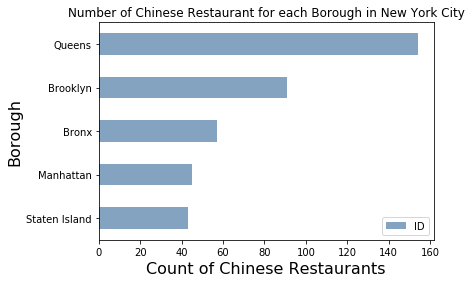

In [26]:
# title
plt.title('Number of Chinese Restaurant for each Borough in New York City')
#On x-axis
plt.xlabel('Count of Chinese Restaurants', fontsize = 16)
#On y-axis
plt.ylabel('Count of Chinese Restaurants', fontsize=16)
#giving a bar plot
rest_ny.groupby('Borough')['ID'].count().nsmallest().plot(kind='barh',color=(0.2, 0.4, 0.6, 0.6))
#legend
plt.legend()
#displays the plot
plt.show()

In [27]:
df_xx = rest_ny.groupby('Borough')['ID'].count()
df_kk = df_xx.to_frame()

In [28]:
df_fin_AVE = pd.merge(df_fin_densityy,df_kk, on= 'Borough')
df_fin_AVE["AVE CR"] = df_fin_AVE["Density"]/df_fin_AVE["ID"]
df_fin_AVE

Borough  Density   ID      AVE CR
0          Bronx    13231   57  232.122807
1       Brooklyn    14649   91  160.978022
2      Manhattan    27826   45  618.355556
3         Queens     8354  154   54.246753
4  Staten Island     3132   43   72.837209

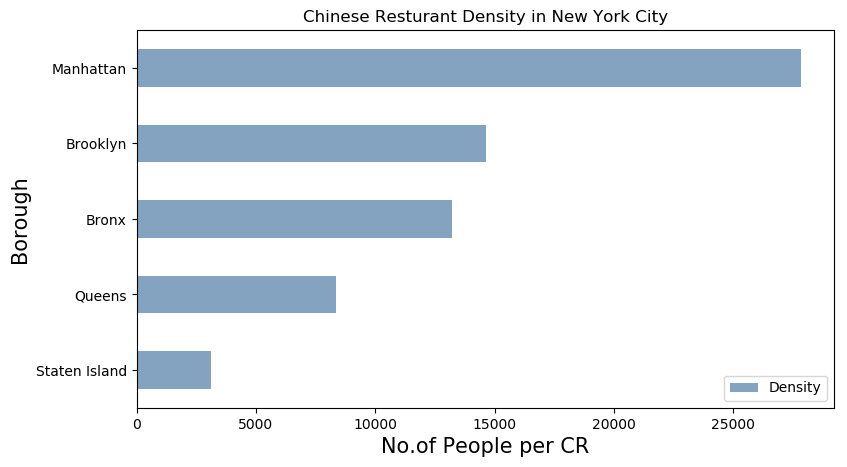

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Chinese Resturant Density in New York City')
#On x-axis
plt.xlabel('No.of People per CR', fontsize = 15)
#On y-axis
plt.ylabel('No.of People per CR', fontsize=15)
#giving a bar plot
df_fin_AVE.groupby('Borough')['Density'].sum().nsmallest().plot(kind='barh',color=(0.2, 0.4, 0.6, 0.6))
#legend
plt.legend()
#displays the plot
plt.show()

In [30]:
Map_CR = pd.merge(new_york_df,rest_ny,on = 'Neighborhood')
Map_CR = Map_CR[['Borough_x','Neighborhood','Latitude','Longitude','Name']]

In [31]:
Map_All = folium.Map(location=[Latitude, Longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, Neighborhood in zip(Map_CR['Latitude'], Map_CR['Longitude'], Map_CR['Borough_x'], Map_CR['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_All)  
    
Map_All

In [32]:
Map_CR["Cluster"] = 0
Map_CR.loc[(Map_CR['Borough_x'] == 'Bronx') ,'Cluster'] = '0'
Map_CR.loc[(Map_CR['Borough_x'] == 'Brooklyn') ,'Cluster'] = '1'
Map_CR.loc[(Map_CR['Borough_x'] == 'Manhattan') ,'Cluster'] = '2'
Map_CR.loc[(Map_CR['Borough_x'] == 'Queens') ,'Cluster'] = '3'
Map_CR.loc[(Map_CR['Borough_x'] == 'Staten Island') ,'Cluster'] = '4'
Map_CR["Cluster"] = Map_CR["Cluster"].astype(str).astype(int)
Map_CR


Borough_x               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                 Co-op City  40.874294 -73.829939   
3            Bronx                Eastchester  40.887556 -73.827806   
4            Bronx                  Fieldston  40.895437 -73.905643   
5        Manhattan                Marble Hill  40.876551 -73.910660   
6            Bronx                    Norwood  40.877224 -73.879391   
7            Bronx                    Norwood  40.877224 -73.879391   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx                 Baychester  40.866858 -73.835798   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx             Pelham Parkway  40.857413 -73.854756   
13           Bronx                City Island  40.847247 -73.786488   
14           Bronx               Bedford Park  40.870185 -73.885512   
15           Bronx               Bedford Park  40.870185 -73.885512   
16           Bronx               Bedford Park  40.870185 -73.885512   
17           Bronx             Morris Heights  40.847898 -73.919672   
18           Bronx             Morris Heights  40.847898 -73.919672   
19           Bronx             Morris Heights  40.847898 -73.919672   
20           Bronx                    Fordham  40.860997 -73.896427   
21           Bronx               East Tremont  40.842696 -73.887356   
22           Bronx                 West Farms  40.839475 -73.877745   
23           Bronx                    Melrose  40.819754 -73.909422   
24           Bronx                    Melrose  40.819754 -73.909422   
25           Bronx                    Melrose  40.819754 -73.909422   
26           Bronx                Port Morris  40.801664 -73.913221   
27           Bronx                   Longwood  40.815099 -73.895788   
28           Bronx                   Longwood  40.815099 -73.895788   
29           Bronx                  Soundview  40.821012 -73.865746   
30           Bronx                  Soundview  40.821012 -73.865746   
31           Bronx               Country Club  40.844246 -73.824099   
32           Bronx                Parkchester  40.837938 -73.856003   
33           Bronx         Westchester Square  40.840619 -73.842194   
34           Bronx         Westchester Square  40.840619 -73.842194   
35           Bronx                Morris Park  40.847549 -73.850402   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                  Olinville  40.871371 -73.863324   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx                  Concourse  40.834284 -73.915589   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                  Unionport  40.829774 -73.850535   
46           Bronx                   Edenwald  40.884561 -73.848083   
47        Brooklyn                  Bay Ridge  40.625801 -74.030621   
48        Brooklyn                  Bay Ridge  40.625801 -74.030621   
49        Brooklyn                  Bay Ridge  40.625801 -74.030621   
50        Brooklyn                Bensonhurst  40.611009 -73.995180   
51        Brooklyn                Bensonhurst  40.611009 -73.995180   
52        Brooklyn                Bensonhurst  40.611009 -73.995180   
53        Brooklyn                Sunset Park  40.645103 -74.010316   
54        Brooklyn                Sunset Park  40.645103 -74.010316   
55        Brooklyn               

In [33]:
# create map
kclusters = 5
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Map_CR['Latitude'], Map_CR['Longitude'], Map_CR['Neighborhood'], Map_CR['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
Manhattan_neigh= Map_CR[Map_CR['Borough_x'] == 'Manhattan']
Manhattan_neigh = Manhattan_neigh.reset_index(drop = True)
Manhattan_neigh.groupby('Neighborhood').count()

Borough_x  Latitude  Longitude  Name  Cluster
Neighborhood                                                      
Central Harlem               2         2          2     2        2
Chelsea                      1         1          1     1        1
Chinatown                    2         2          2     2        2
Civic Center                 1         1          1     1        1
East Harlem                  1         1          1     1        1
East Village                 1         1          1     1        1
Gramercy                     2         2          2     2        2
Hamilton Heights             3         3          3     3        3
Inwood                       2         2          2     2        2
Lenox Hill                   1         1          1     1        1
Little Italy                 1         1          1     1        1
Lower East Side              2         2          2     2        2
Manhattan Valley             4         4          4     4        4
Manhattanville               2         2          2     2        2
Marble Hill                  1         1          1     1        1
Midtown                      1         1          1     1        1
Midtown South                2         2          2     2        2
Morningside Heights          3         3          3     3        3
Murray Hill                  2         2          2     2        2
Noho                         2         2          2     2        2
Tribeca                      1         1          1     1        1
Upper East Side              1         1          1     1        1
Upper West Side              2         2          2     2        2
Washington Heights           3         3          3     3        3
Yorkville                    2         2          2     2        2

In [35]:
Manhattan_CR = Manhattan_neigh.groupby('Neighborhood').count()
Manhattan_CR = Manhattan_CR[["Borough_x"]]
Manhattan_CR

Borough_x
Neighborhood                  
Central Harlem               2
Chelsea                      1
Chinatown                    2
Civic Center                 1
East Harlem                  1
East Village                 1
Gramercy                     2
Hamilton Heights             3
Inwood                       2
Lenox Hill                   1
Little Italy                 1
Lower East Side              2
Manhattan Valley             4
Manhattanville               2
Marble Hill                  1
Midtown                      1
Midtown South                2
Morningside Heights          3
Murray Hill                  2
Noho                         2
Tribeca                      1
Upper East Side              1
Upper West Side              2
Washington Heights           3
Yorkville                    2

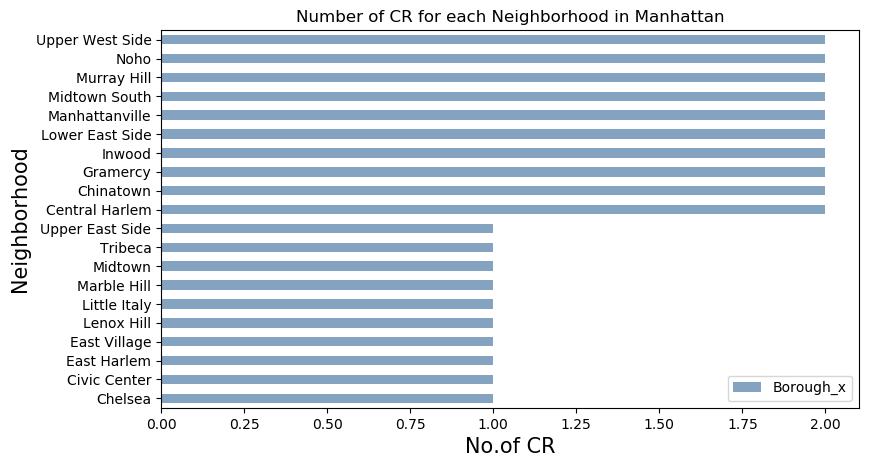

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of CR for each Neighborhood in Manhattan')
#On x-axis
plt.xlabel('No.of CR', fontsize = 15)
#On y-axis
plt.ylabel('No.of CR', fontsize=15)
#giving a bar plot
Manhattan_CR.groupby('Neighborhood')['Borough_x'].sum().nsmallest(20).plot(kind='barh',color=(0.2, 0.4, 0.6, 0.6))
#legend
plt.legend()
#displays the plot
plt.show()

In [38]:
Manhattan_neigh_map= Map_CR[Map_CR['Borough_x'] == 'Manhattan']
df_Man_change = Manhattan_neigh_map.groupby('Neighborhood').first()
df_Man_changeNew = pd.merge(df_Man_change,Manhattan_CR,on='Neighborhood')
df_Man_changeNew = df_Man_changeNew[["Latitude","Longitude","Borough_x_y"]]
df_Man_changeNew

Latitude  Longitude  Borough_x_y
Neighborhood                                          
Central Harlem       40.815976 -73.943211            2
Chelsea              40.744035 -74.003116            1
Chinatown            40.715618 -73.994279            2
Civic Center         40.715229 -74.005415            1
East Harlem          40.792249 -73.944182            1
East Village         40.727847 -73.982226            1
Gramercy             40.737210 -73.981376            2
Hamilton Heights     40.823604 -73.949688            3
Inwood               40.867684 -73.921210            2
Lenox Hill           40.768113 -73.958860            1
Little Italy         40.719324 -73.997305            1
Lower East Side      40.717807 -73.980890            2
Manhattan Valley     40.797307 -73.964286            4
Manhattanville       40.816934 -73.957385            2
Marble Hill          40.876551 -73.910660            1
Midtown              40.754691 -73.981669            1
Midtown South        40.748510 -73.988713            2
Morningside Heights  40.808000 -73.963896            3
Murray Hill          40.748303 -73.978332            2
Noho                 40.723259 -73.988434            2
Tribeca              40.721522 -74.010683            1
Upper East Side      40.775639 -73.960508            1
Upper West Side      40.787658 -73.977059            2
Washington Heights   40.851903 -73.936900            3
Yorkville            40.775930 -73.947118            2

In [39]:
kclusters = 6

manhattan_grouped_clustering = df_Man_changeNew

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 0, 1, 1, 1, 0, 3, 4, 1])

In [40]:
Man_map = Map_CR[Map_CR['Borough_x'] == 'Manhattan'] #all data
Man_map = Man_map.reset_index(drop = True)
Man_map

Borough_x         Neighborhood   Latitude  Longitude  \
0   Manhattan          Marble Hill  40.876551 -73.910660   
1   Manhattan            Chinatown  40.715618 -73.994279   
2   Manhattan            Chinatown  40.715618 -73.994279   
3   Manhattan   Washington Heights  40.851903 -73.936900   
4   Manhattan   Washington Heights  40.851903 -73.936900   
5   Manhattan   Washington Heights  40.851903 -73.936900   
6   Manhattan               Inwood  40.867684 -73.921210   
7   Manhattan               Inwood  40.867684 -73.921210   
8   Manhattan     Hamilton Heights  40.823604 -73.949688   
9   Manhattan     Hamilton Heights  40.823604 -73.949688   
10  Manhattan     Hamilton Heights  40.823604 -73.949688   
11  Manhattan       Manhattanville  40.816934 -73.957385   
12  Manhattan       Manhattanville  40.816934 -73.957385   
13  Manhattan       Central Harlem  40.815976 -73.943211   
14  Manhattan       Central Harlem  40.815976 -73.943211   
15  Manhattan          East Harlem  40.792249 -73.944182   
16  Manhattan      Upper East Side  40.775639 -73.960508   
17  Manhattan            Yorkville  40.775930 -73.947118   
18  Manhattan            Yorkville  40.775930 -73.947118   
19  Manhattan           Lenox Hill  40.768113 -73.958860   
20  Manhattan      Upper West Side  40.787658 -73.977059   
21  Manhattan      Upper West Side  40.787658 -73.977059   
22  Manhattan              Midtown  40.754691 -73.981669   
23  Manhattan          Murray Hill  40.748303 -73.978332   
24  Manhattan          Murray Hill  40.748303 -73.978332   
25  Manhattan              Chelsea  40.744035 -74.003116   
26  Manhattan         East Village  40.727847 -73.982226   
27  Manhattan      Lower East Side  40.717807 -73.980890   
28  Manhattan      Lower East Side  40.717807 -73.980890   
29  Manhattan              Tribeca  40.721522 -74.010683   
30  Manhattan         Little Italy  40.719324 -73.997305   
31  Manhattan     Manhattan Valley  40.797307 -73.964286   
32  Manhattan     Manhattan Valley  40.797307 -73.964286   
33  Manhattan     Manhattan Valley  40.797307 -73.964286   
34  Manhattan     Manhattan Valley  40.797307 -73.964286   
35  Manhattan  Morningside Heights  40.808000 -73.963896   
36  Manhattan  Morningside Heights  40.808000 -73.963896   
37  Manhattan  Morningside Heights  40.808000 -73.963896   
38  Manhattan             Gramercy  40.737210 -73.981376   
39  Manhattan             Gramercy  40.737210 -73.981376   
40  Manhattan                 Noho  40.723259 -73.988434   
41  Manhattan                 Noho  40.723259 -73.988434   
42  Manhattan         Civic Center  40.715229 -74.005415   
43  Manhattan        Midtown South  40.748510 -73.988713   
44  Manhattan        Midtown South  40.748510 -73.988713   

                             Name  Cluster  
0   Lucky Star Chinese Restaurant        2  
1              Xi'an Famous Foods        2  
2                        Hwa Yuan        2  
3                     Yang Garden        2  
4                     Golden Star        2  
5        No. 1 Chinese Restaurant        2  
6                   Lotus Express        2  
7                        "U" Like        2  
8           The Handpulled Noodle        2  
9                      King's Wok        2  
10          Crispy Bamboo Village        2  
11                      Dun Huang        2  
12          Crispy Bamboo Village        2  
13          Crispy Bamboo Village        2  
14          88 Chinese Restaurant        2  
15              Steak and Hoagies        2  
16                     Pig Heaven        2  
17                     Noodle Fun        2  
18                    Charley Mom        2  
19                       Shanghai        2  
20                    Han Dynasty        2  
21                        RedFarm        2  
22                     Café China        2  
23                     Café China        2  
24             Xi'an Famous Foods        2  
25                       Buddakan        2  
26                   Málà Pr

In [41]:
# add clustering labels
df_Man_changeNew.insert(0, 'Cluster Labels', kmeans.labels_)
df_Man_changeNew

Cluster Labels   Latitude  Longitude  Borough_x_y
Neighborhood                                                          
Central Harlem                    4  40.815976 -73.943211            2
Chelsea                           1  40.744035 -74.003116            1
Chinatown                         0  40.715618 -73.994279            2
Civic Center                      1  40.715229 -74.005415            1
East Harlem                       1  40.792249 -73.944182            1
East Village                      1  40.727847 -73.982226            1
Gramercy                          0  40.737210 -73.981376            2
Hamilton Heights                  3  40.823604 -73.949688            3
Inwood                            4  40.867684 -73.921210            2
Lenox Hill                        1  40.768113 -73.958860            1
Little Italy                      1  40.719324 -73.997305            1
Lower East Side                   0  40.717807 -73.980890            2
Manhattan Valley                  2  40.797307 -73.964286            4
Manhattanville                    4  40.816934 -73.957385            2
Marble Hill                       5  40.876551 -73.910660            1
Midtown                           1  40.754691 -73.981669            1
Midtown South                     0  40.748510 -73.988713            2
Morningside Heights               3  40.808000 -73.963896            3
Murray Hill                       0  40.748303 -73.978332            2
Noho                              0  40.723259 -73.988434            2
Tribeca                           1  40.721522 -74.010683            1
Upper East Side                   1  40.775639 -73.960508            1
Upper West Side                   4  40.787658 -73.977059            2
Washington Heights                3  40.851903 -73.936900            3
Yorkville                         4  40.775930 -73.947118            2

In [42]:
Final_map_Manhattan = pd.merge(Man_map,df_Man_changeNew,on = 'Neighborhood')
Final_map_Manhattan

Borough_x         Neighborhood  Latitude_x  Longitude_x  \
0   Manhattan          Marble Hill   40.876551   -73.910660   
1   Manhattan            Chinatown   40.715618   -73.994279   
2   Manhattan            Chinatown   40.715618   -73.994279   
3   Manhattan   Washington Heights   40.851903   -73.936900   
4   Manhattan   Washington Heights   40.851903   -73.936900   
5   Manhattan   Washington Heights   40.851903   -73.936900   
6   Manhattan               Inwood   40.867684   -73.921210   
7   Manhattan               Inwood   40.867684   -73.921210   
8   Manhattan     Hamilton Heights   40.823604   -73.949688   
9   Manhattan     Hamilton Heights   40.823604   -73.949688   
10  Manhattan     Hamilton Heights   40.823604   -73.949688   
11  Manhattan       Manhattanville   40.816934   -73.957385   
12  Manhattan       Manhattanville   40.816934   -73.957385   
13  Manhattan       Central Harlem   40.815976   -73.943211   
14  Manhattan       Central Harlem   40.815976   -73.943211   
15  Manhattan          East Harlem   40.792249   -73.944182   
16  Manhattan      Upper East Side   40.775639   -73.960508   
17  Manhattan            Yorkville   40.775930   -73.947118   
18  Manhattan            Yorkville   40.775930   -73.947118   
19  Manhattan           Lenox Hill   40.768113   -73.958860   
20  Manhattan      Upper West Side   40.787658   -73.977059   
21  Manhattan      Upper West Side   40.787658   -73.977059   
22  Manhattan              Midtown   40.754691   -73.981669   
23  Manhattan          Murray Hill   40.748303   -73.978332   
24  Manhattan          Murray Hill   40.748303   -73.978332   
25  Manhattan              Chelsea   40.744035   -74.003116   
26  Manhattan         East Village   40.727847   -73.982226   
27  Manhattan      Lower East Side   40.717807   -73.980890   
28  Manhattan      Lower East Side   40.717807   -73.980890   
29  Manhattan              Tribeca   40.721522   -74.010683   
30  Manhattan         Little Italy   40.719324   -73.997305   
31  Manhattan     Manhattan Valley   40.797307   -73.964286   
32  Manhattan     Manhattan Valley   40.797307   -73.964286   
33  Manhattan     Manhattan Valley   40.797307   -73.964286   
34  Manhattan     Manhattan Valley   40.797307   -73.964286   
35  Manhattan  Morningside Heights   40.808000   -73.963896   
36  Manhattan  Morningside Heights   40.808000   -73.963896   
37  Manhattan  Morningside Heights   40.808000   -73.963896   
38  Manhattan             Gramercy   40.737210   -73.981376   
39  Manhattan             Gramercy   40.737210   -73.981376   
40  Manhattan                 Noho   40.723259   -73.988434   
41  Manhattan                 Noho   40.723259   -73.988434   
42  Manhattan         Civic Center   40.715229   -74.005415   
43  Manhattan        Midtown South   40.748510   -73.988713   
44  Manhattan        Midtown South   40.748510   -73.988713   

                             Name  Cluster  Cluster Labels  Latitude_y  \
0   Lucky Star Chinese Restaurant        2               5   40.876551   
1              Xi'an Famous Foods        2               0   40.715618   
2                        Hwa Yuan        2               0   40.715618   
3                     Yang Garden        2               3   40.851903   
4                     Golden Star        2               3   40.851903   
5        No. 1 Chinese Restaurant        2               3   40.851903   
6                   Lotus Express        2               4   40.867684   
7                        "U" Like        2               4   40.867684   
8           The Handpulled Noodle        2               3   40.823604   
9                      King's Wok        2               3   40.823604   
10          Crispy Bamboo Village        2               3   40.823604   
11                      Dun Huang        2               4   40.816934   
12          Crispy Bamboo Village        2               4   40.816934   
13          Crispy Bamboo Village        2               4   40.81597

In [43]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Final_map_Manhattan['Latitude_x'], Final_map_Manhattan['Longitude_x'], Final_map_Manhattan['Neighborhood'], Final_map_Manhattan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters